In [262]:
from Bio import SeqIO

In [261]:
from Bio.Data import CodonTable

In [277]:
print(Bio.Data.CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]) #Analyze the mitochondria table

Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [275]:
import Bio.Data.CodonTable

In [131]:
import pandas as pd

In [132]:
penguins = "penguins_cytb.fasta"

1.

In [133]:
def get_sequences_from_file(fasta_fn): #Defining a function
    sequence_data_dict = {}    #setting the directory which we will be inputting our work
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split() #Parsing the file and then splitting it into 2 
        species_name = description[1] + " " + description[2] #separating the species name from the sequence
        sequence_data_dict[species_name] = record.seq #Sets the species name as the first thing being displayed while the sequence is added.
    return(sequence_data_dict)

In [145]:
get_sequences_from_file(penguins) #checking to see what is outputted

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

2.

In [199]:
def translate_function(string_nucleotides): #Defining my function
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] #Setting my codon table.
    aa_seq_string="" #Creating an empty string which will store the nucleotides as my loop goes through.
    for i in range(0, len(string_nucleotides),3): #Setting my starting position at 0
            codon = string_nucleotides[i:i +3] #Defining what a codon is 
            if codon in ["AGG", "AGA","TAA","TAG"]:#Telling my loop to stop on a stop codon
                print('STOP')
                break
            else: 
                aa_seq_string += mito_table.forward_table[codon] #Will take the codon and add it to my growing list as it loops through
                print(aa_seq_string)
    return(aa_seq_string) #Displaying 
#Resource used https://stackoverflow.com/questions/64360483/python-translating-nucleotide-to-amino-acid

In [264]:
sequence = "AGTTCCAGGCTC" #Creating a sequence including a stop codon

In [279]:
translate_function(sequence) #Using my function


S
SS
STOP


'SS'

3.

In [206]:
from Bio.Seq import translate #Importing a module to translate my function
# Used https://biopython.org/docs/dev/api/Bio.Seq.html as a resource

In [272]:
def translate(string_nucleotides):
    aa_seq_string="" #Creating an empty string where my results will be stored
    aa_seq_string = Seq.translate(string_nucleotides, table =2) #this string will then be translated by the Bio.Seq translate function using codon table 2 (found by printing table in earlier steps)
    print(aa_seq_string)
    return(aa_seq_string)


In [278]:
translate(sequence) #Using translate on the sequence I created yay both my loop Bio.Seq translate have the same a.a.

SS*L


Seq('SS*L')

4.

In [179]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [379]:
def compute_molecular_weight(aa_seq):
       
        MW_aa = ProteinAnalysis(str(aa_seq)) #Creating a string to be able to use protein analysis
        weight = MW_aa.molecular_weight() #Calculating molecular weight
        print (weight)
        return(weight)

In [380]:
compute_molecular_weight(sequence) #testing the function

1047.2083


1047.2083

5.

In [341]:
from Bio.SeqUtils import GC

In [343]:
def GC_content(seq): #Defining my function
    DNA = "" #Creating empty string that will hold my loop.
    DNA = GC(seq) #using the GC function from Bio.SeqUtils GC
    print(DNA)
    return(DNA)

In [381]:
GC_content(sequence) #testing the function

58.333333333333336


58.333333333333336

6. 

In [427]:
cytb_seq= get_sequences_from_file("penguins_cytb.fasta") 

In [424]:
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass
species_list = list(penguins_df.species)

In [405]:
import numpy as np

In [382]:
print(cytb_seq)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

In [411]:
print(penguins_df)

                    species   mass
0      Aptenodytes forsteri  28.00
1   Aptenodytes patagonicus  13.40
2       Eudyptes chrysocome   2.80
3     Eudyptes chrysolophus   4.50
4         Eudyptes sclateri   4.25
5           Eudyptula minor   1.60
6        Pygoscelis adeliae   4.60
7     Pygoscelis antarctica   4.10
8          Pygoscelis papua   6.10
9       Spheniscus demersus   3.20
10     Spheniscus humboldti   4.75
11  Spheniscus magellanicus   3.40


In [415]:
 penguins_df['Molecular_Weight'] = 'NaN' #Adding Molecular_Weight column

In [417]:
penguins_df['GC_Content'] = 'NaN' #Adding GC_Content columns

In [418]:
print(penguins_df) #Checking to see if it was added

                    species   mass Molecular_Weight GC_Content
0      Aptenodytes forsteri  28.00              NaN        NaN
1   Aptenodytes patagonicus  13.40              NaN        NaN
2       Eudyptes chrysocome   2.80              NaN        NaN
3     Eudyptes chrysolophus   4.50              NaN        NaN
4         Eudyptes sclateri   4.25              NaN        NaN
5           Eudyptula minor   1.60              NaN        NaN
6        Pygoscelis adeliae   4.60              NaN        NaN
7     Pygoscelis antarctica   4.10              NaN        NaN
8          Pygoscelis papua   6.10              NaN        NaN
9       Spheniscus demersus   3.20              NaN        NaN
10     Spheniscus humboldti   4.75              NaN        NaN
11  Spheniscus magellanicus   3.40              NaN        NaN


7.

In [441]:
for key, value in cytb_seq.items():
    aa_seq = translate_function(value) # function #2
    MW_aa = ProteinAnalysis(str(aa_seq)) #Creating a string to be able to use protein analysis
    weight = MW_aa.molecular_weight()
    DNA = GC(aa_seq)
    penguins_df["Molecular_Weight"] = weight
    penguins_df["GC_Content"] = DNA #Wasn't able to get my loop to work 

In [439]:
print(penguins_df)

                    species   mass  Molecular_Weight  GC_Content
0      Aptenodytes forsteri  28.00       551904.8033   13.481781
1   Aptenodytes patagonicus  13.40       551904.8033   13.481781
2       Eudyptes chrysocome   2.80       551904.8033   13.481781
3     Eudyptes chrysolophus   4.50       551904.8033   13.481781
4         Eudyptes sclateri   4.25       551904.8033   13.481781
5           Eudyptula minor   1.60       551904.8033   13.481781
6        Pygoscelis adeliae   4.60       551904.8033   13.481781
7     Pygoscelis antarctica   4.10       551904.8033   13.481781
8          Pygoscelis papua   6.10       551904.8033   13.481781
9       Spheniscus demersus   3.20       551904.8033   13.481781
10     Spheniscus humboldti   4.75       551904.8033   13.481781
11  Spheniscus magellanicus   3.40       551904.8033   13.481781


8.

In [442]:
import matplotlib.pyplot as plt #importing libary that I will use to create plots 
import seaborn as sns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Aptenodytes forsteri'),
  Text(1, 0, 'Aptenodytes patagonicus'),
  Text(2, 0, 'Eudyptes chrysocome'),
  Text(3, 0, 'Eudyptes chrysolophus'),
  Text(4, 0, 'Eudyptes sclateri'),
  Text(5, 0, 'Eudyptula minor'),
  Text(6, 0, 'Pygoscelis adeliae'),
  Text(7, 0, 'Pygoscelis antarctica'),
  Text(8, 0, 'Pygoscelis papua'),
  Text(9, 0, 'Spheniscus demersus'),
  Text(10, 0, 'Spheniscus humboldti'),
  Text(11, 0, 'Spheniscus magellanicus')])

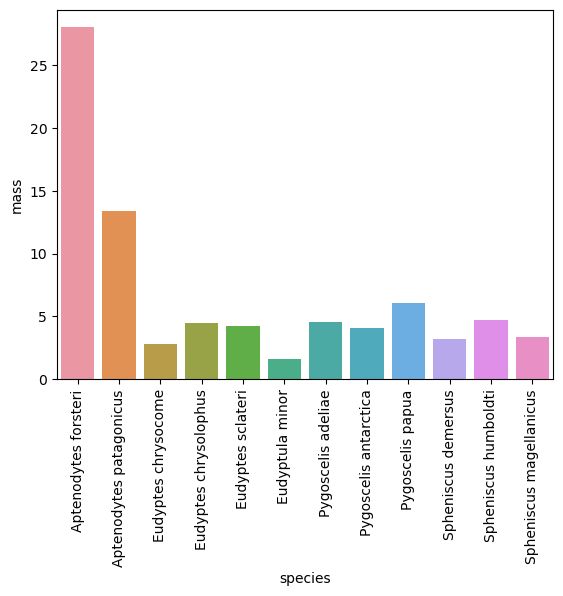

In [480]:
sns.barplot(x='species',  y='mass', data = penguins_df) #resource used https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
plt.xticks(fontsize=10, rotation=90) #used smaller font size and then rotated the labels for better vizualization

1. Smallest penguin is the Eudyptes minor.
2. Biggest penguin is the Aptenodytes forsteri

9.

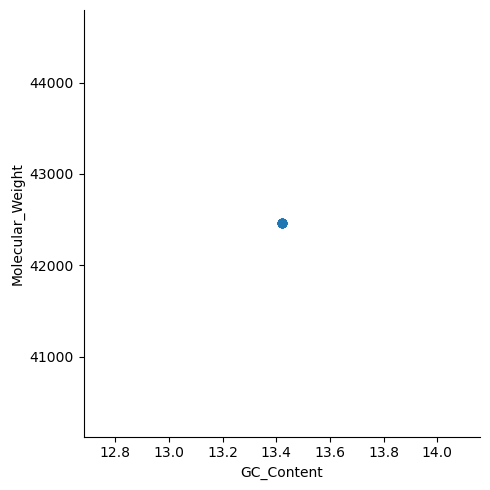

In [481]:
sns.lmplot(data=penguins_df, x="GC_Content",y="Molecular_Weight") #Resource https://seaborn.pydata.org/generated/seaborn.lmplot.html
#Only one dot is shown due to not getting for loop to work.

10. 

In [482]:
penguins_df.to_csv('LM_penguins.csv')